<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Apprentice Chef | Analysis Report</h2>
<br>Pimkarn Mekpruksawong<br>
Hult International Business School
<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h2>Introduction</h2><br>
The company had established an analytic project which aimed to better understand customers in two aspects:<br>

    1. Expected revenue from each customer over the first year of orders.
    2. The success of Halfway There, a cross-selling promotion.

<br>


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Revenue </h3><br>

The average duration of meal preparation instruction video played is a key feature that impacts revenue. For every 1% increase in the average duration, the revenue expects to increase by 57%. This is because the more customers watch the videos, the more customers engage in the services. Therefore, the company should provide various videos to offer customers more choices and inspire them to cook and promote them on social media to attract new customers.

<br>
Additionally, the total number of meals ordered by each customer impacts revenue; the more orders, the more revenues increase. Therefore, the bundle offering could increase the customers' willingness-to-pay such as bundle pricing for two meal sets. Also, rush order offering for customers who want to receive meal sets on the same day.

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Cross-selling promotion</h3><br>

The number of meals canceled before noon has an impact on a cross-selling promotion. Customers who had many cancellations tend not to subscribe to this service because this campaign delivers every Wednesday when people have to work. This can cause unforeseen circumstances such as meetings and overtime. To minimize the number of cancellations, the company should allow customers to reschedule their delivery. Also, offer a discount for the proportional reduction in the number of cancellations relative to the last year to encourage customers to improve their performance.

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Model Performance</h2><br>


* Revenue model: 0.721<br>
* Cross-selling model: 0.737<br>


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Conclusion</h2><br>

It is beneficial for the company to promote meal preparation videos and offer bundle pricing to increase revenue. While managing the number of cancellations by rescheduling delivery and offering cancellations discounts to promote a cross-selling promotion.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Appendix</h2>

<h4>Coding 1: Regression modeling </h4>

In [1]:
############################################################
# import the neccessary packages and load dataset
############################################################

# importing libraries
import numpy             as np                    
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split

# regression modeling
import sklearn.linear_model                          # linear models
from sklearn.linear_model import LinearRegression

# classification modeling
#from sklearn.metrics import confusion_matrix        # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     
from sklearn.model_selection import RandomizedSearchCV   # hyperparameter tuning
from sklearn.metrics import make_scorer                 # customizable scorer to use AUC instead of Accuracy metric

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
chef = pd.read_excel(file)


####################################################
# Log transformation
####################################################
log_transform = ['REVENUE','AVG_TIME_PER_SITE_VISIT','AVG_PREP_VID_TIME',
                 'TOTAL_MEALS_ORDERED' ,
                 'UNIQUE_MEALS_PURCH' ,
                 'CONTACTS_W_CUSTOMER_SERVICE',
                 'LARGEST_ORDER_SIZE',
                 'MASTER_CLASSES_ATTENDED',
                 'TOTAL_PHOTOS_VIEWED']

# looping to apply log transformation
for log_val in log_transform:
    # creating columns with log transformed
    chef['log_' + log_val] = np.log10(chef[log_val] + 1) # plus 1 to deal with zero value
    

####################################################
# Preparing Explanatory and Response Data
####################################################

# declaring explanatory variables
x_variables = [ 'CROSS_SELL_SUCCESS' ,'log_AVG_TIME_PER_SITE_VISIT' ,
                'log_AVG_PREP_VID_TIME' ,'log_TOTAL_MEALS_ORDERED' ,
                'log_UNIQUE_MEALS_PURCH' ,'log_CONTACTS_W_CUSTOMER_SERVICE',
                'log_LARGEST_ORDER_SIZE','log_MASTER_CLASSES_ATTENDED' ,
                'MEDIAN_MEAL_RATING' ,'log_TOTAL_PHOTOS_VIEWED']

chef_data_OLS   = chef[x_variables]

# declaring response variable
chef_target_OLS = chef.loc[ : , 'log_REVENUE']


####################################################
# Prepare train-test split
####################################################

# train-test split with stratification
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            chef_data_OLS,
            chef_target_OLS,
            test_size    = 0.25,
            random_state = 219)



# merging X_train and y_train so that they can be used in statsmodels
chef_train_OLS = pd.concat([x_train_OLS, y_train_OLS], axis = 1)


####################################################
# OLS regression model in scikit-learn
####################################################

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(3))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(3)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(3)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(3)


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(3))
lr_test_gap = abs(lr_train_score - lr_test_score).round(3)

####################################################
# Zipping each feature name to its coefficient
####################################################

lr_model_values = zip(chef_data_OLS[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 3))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# display the results
lr_model_lst_df = pd.DataFrame(lr_model_lst)
lr_model_lst_df.columns = ['Variables', 'Coefficients']
lr_model_lst_df.sort_values(by = 'Coefficients')



OLS Training Score : 0.718
OLS Testing Score  : 0.721
OLS Train-Test Gap : 0.003


,Variables,Coefficients
5,log_UNIQUE_MEALS_PURCH,-0.200
7,log_LARGEST_ORDER_SIZE,-0.170
2,log_AVG_TIME_PER_SITE_VISIT,-0.040
1,CROSS_SELL_SUCCESS,-0.020
10,log_TOTAL_PHOTOS_VIEWED,0.010
9,MEDIAN_MEAL_RATING,0.070
6,log_CONTACTS_W_CUSTOMER_SERVICE,0.120
8,log_MASTER_CLASSES_ATTENDED,0.120
4,log_TOTAL_MEALS_ORDERED,0.260
3,log_AVG_PREP_VID_TIME,0.570


<h4>Coding 2: Classification modeling </h4>

In [2]:
####################################################
# Feature Engineering
####################################################

## 1. customer using mobile number (1) and select taste and preferences (1)
# create dummy variable 
chef['mobile_taste']   = 0

# iterating over each value 
for index, value in chef.iterrows():
    
    if chef.loc[index, 'MOBILE_NUMBER'] > 0 and chef.loc[index, 'TASTES_AND_PREFERENCES'] > 0:
        chef.loc[index, 'mobile_taste'] = 1
        

## 2. develop a number of names feature.  
# create UDF to splits values in a string and sums number of resulting items
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    
    df[new_col_name] = 0
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

# calling text_split_feature
text_split_feature(col = 'NAME',
                   df  = chef)

        
## 3. has a package locker (1) and has refrigerated compartments (1)
# create dummy variable 
chef['locker_fridge']   = 0

# iterating over each value 
for index, value in chef.iterrows():
    
    if chef.loc[index, 'PACKAGE_LOCKER'] > 0 and chef.loc[index, 'REFRIGERATED_LOCKER'] > 0 :
        chef.loc[index, 'locker_fridge'] = 1
        
## 4. email
## splitting email domain from email addresses
# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

## concatenate the email domains as a new column in the dataset.
# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']

# concatenating email_domain with chef dataset
chef = pd.concat([chef, email_df['email_domain']],
                     axis = 1)

# printing value counts of email_domain
chef.loc[: ,'email_domain'].value_counts()

## aggregate the email domains into professional, personal, and junk groups
# email domain types
professional_email_domains = ['@mmm.com','@amex.com','@apple.com',
                                '@boeing.com','@caterpillar.com','@chevron.com',
                                '@cisco.com','@cocacola.com','@disney.com',
                                '@dupont.com','@exxon.com','@ge.org',
                                '@goldmansacs.com','@homedepot.com','@ibm.com',
                                '@intel.com','@jnj.com','@jpmorgan.com',
                                '@mcdonalds.com','@merck.com','@microsoft.com',
                                '@nike.com','@pfizer.com','@pg.com',
                                '@travelers.com','@unitedtech.com',
                                '@unitedhealth.com','@verizon.com',
                                '@visa.com','@walmart.com']
personal_email_domains     = ['@gmail.com','@yahoo.com','@protonmail.com']
junk_email_domains         = ['@me.com','@aol.com','@hotmail.com',
                              '@live.com','@msn.com','@passport.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in chef['email_domain']:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
            
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')

# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)

## one hot encode domain_group variable using get_dummies
# one hot encoding domain_group variables
one_hot_domain_group       = pd.get_dummies(chef['domain_group'])

# dropping categorical variables after they've been encoded
chef = chef.drop(['email_domain','domain_group'], axis = 1)

# joining codings together
chef = chef.join([one_hot_domain_group])

# saving new columns
new_columns = chef.columns

        
####################################################
# Preparing Explanatory and Response Data
####################################################

# declaring explanatory variables
chef_data   = chef.loc[ : , ['CANCELLATIONS_BEFORE_NOON','mobile_taste',
                    'personal', 'professional','number_of_names',
                    'locker_fridge']] 

# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']


####################################################
# Prepare train-test split
####################################################

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


####################################################
# Hyperparameter Tuning on Classification Trees
####################################################

criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)

# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}

# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)

# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,    
                                   n_iter                = 1500,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))

# FITTING to the FULL DATASET
tuned_tree_cv.fit(chef_data, chef_target)


############################################################
# building a model based on hyperparameter tuning results
############################################################

# INSTANTIATING a classification tree object with tuned values
tree_tuned = tuned_tree_cv.best_estimator_

# FIT step is not needed

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)

# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(3))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(3))



<ipython-input-2-0d36c6b86e38>:150: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-2-0d36c6b86e38>:151: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


Training ACCURACY: 0.759
Testing  ACCURACY: 0.791
AUC Score        : 0.737


<h4>Figure 1: Classification modeling - Feature importance </h4>

<ipython-input-3-fb8efbabe978>:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


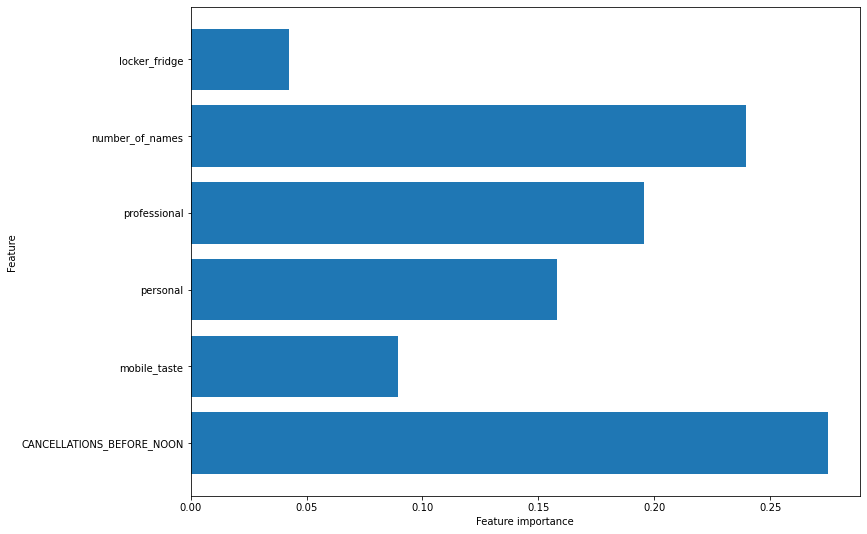

In [3]:
############################################################
# plot_feature_importances for CART model
############################################################
def plot_feature_importances(model, train, export = False):
        
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')
        
# plotting feature importance
plot_feature_importances(tree_tuned,
                         train  = x_train,
                         export = False)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>